In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('spam.csv')

In [11]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2886,ham,My battery is low babe,NaN,NaN,NaN
1493,ham,Hey gals.. Anyone of u going down to e driving...,NaN,NaN,NaN
2199,ham,A boy was late 2 home. His father: \POWER OF F...,NaN,NaN,NaN
4035,ham,Hope you are not scared!,NaN,NaN,NaN
3086,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN


In [12]:
df.shape

(5570, 5)

In [13]:
# 1. Data cleaning 
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5570 non-null   object
 1   v2          5570 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [15]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [16]:
df.sample(5)

,v1,v2
3682,ham,Wake me up at &lt;#&gt; am morning:)
3050,ham,Pls send me the correct name da.
5565,spam,This is the 2nd time we have tried 2 contact u...
1370,ham,1) Go to write msg 2) Put on Dictionary mode 3...
1545,ham,Bishan lar nearer... No need buy so early cos ...


In [17]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2795,ham,Purity of friendship between two is not about ...
5350,ham,Good morning princess! Have a great day!
359,ham,"Hello! Just got here, st andrews-boy its a lon..."
3369,ham,And now electricity just went out fml.
647,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['target'] = encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
# check for duplicate values
df.duplicated().sum()

403

In [23]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(5167, 2)

## 2.EDA

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['target'].value_counts()

target
0    4514
1     653
Name: count, dtype: int64

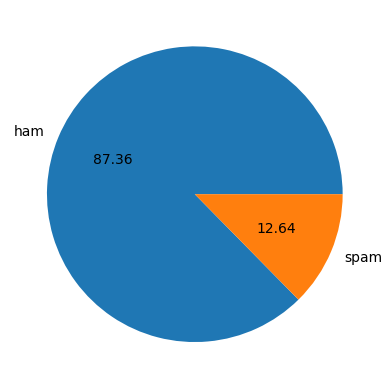

In [28]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [29]:
# =>Data is imbalanced

In [30]:
import nltk

In [31]:
# !pip install nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\TUSHAR
[nltk_data]     TOMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df['num_characters'] = df['text'].apply(len)

In [34]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
# num of words instead of characters
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) 

In [36]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5167.000000,5167.000000,5167.000000
mean,78.943100,18.461196,1.966712
std,58.178429,13.326246,1.450051
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4514.000000,4514.000000,4514.000000
mean,70.475188,17.128268,1.820337
std,56.363260,13.495210,1.383907
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [42]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

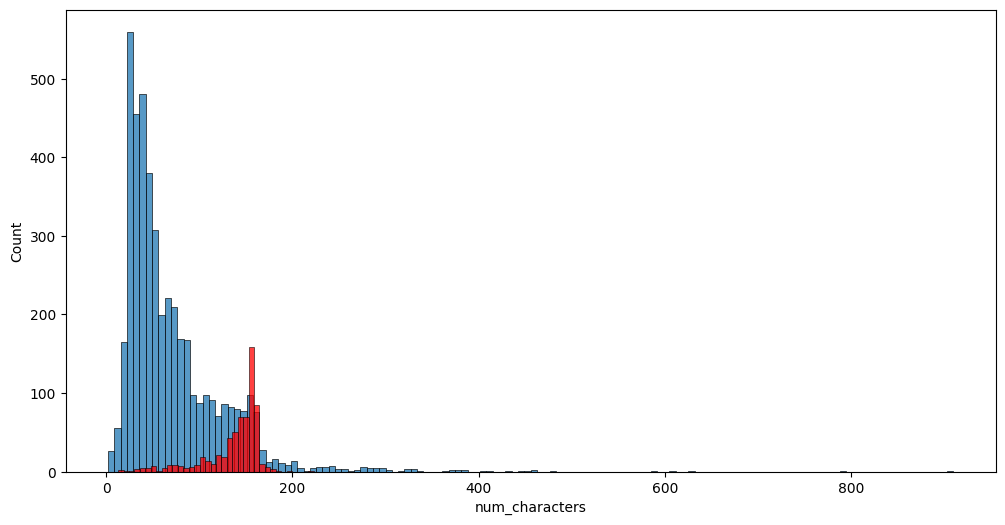

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

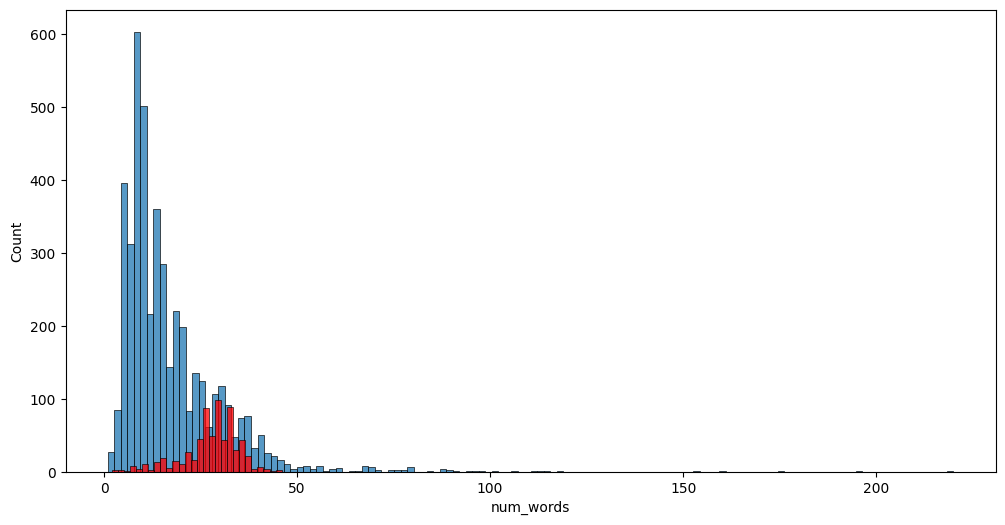

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

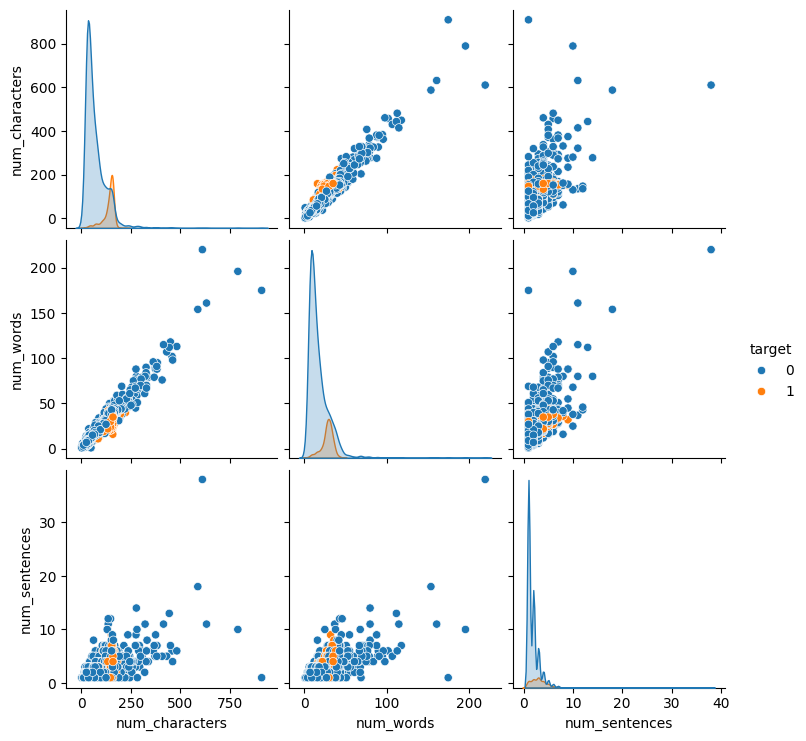

In [45]:
sns.pairplot(df,hue='target')

<Axes: >

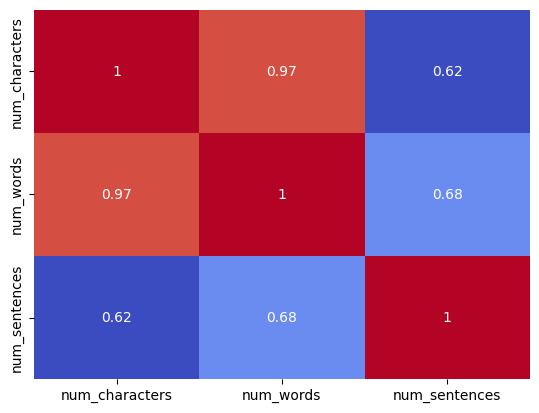

In [46]:
# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns

# Generate the correlation matrix
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False)

In [47]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\TUSHAR
[nltk_data]     TOMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem("dancing")

'danc'

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming - convert dance , dancing etc words into dance 

In [50]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [51]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [52]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

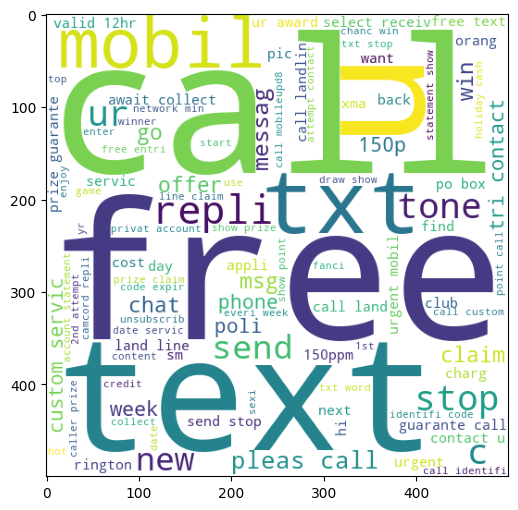

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

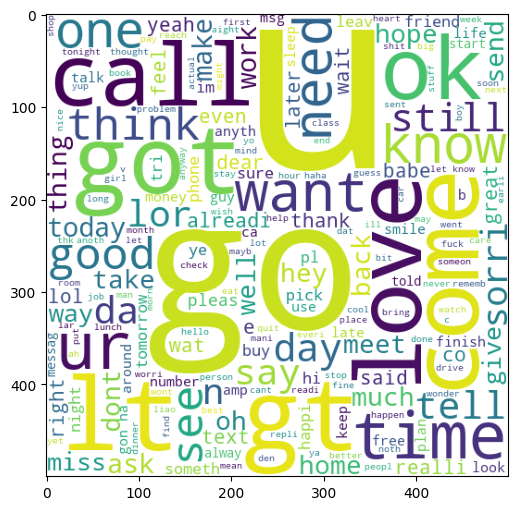

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [62]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [63]:
len(spam_corpus)

9941

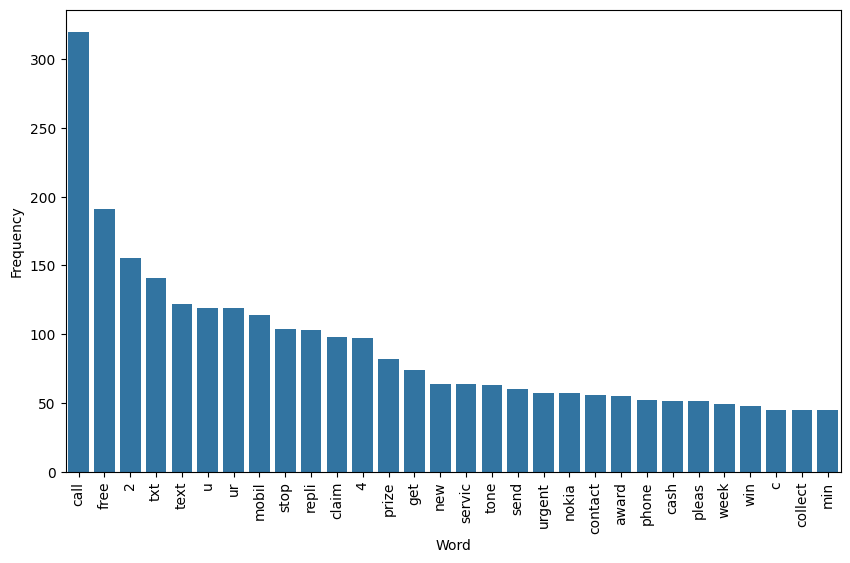

In [64]:
from collections import Counter
counter_data = Counter(spam_corpus).most_common(30)
df_counter = pd.DataFrame(counter_data, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_counter)
plt.xticks(rotation='vertical')
plt.show()


In [65]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
len(ham_corpus)

35299

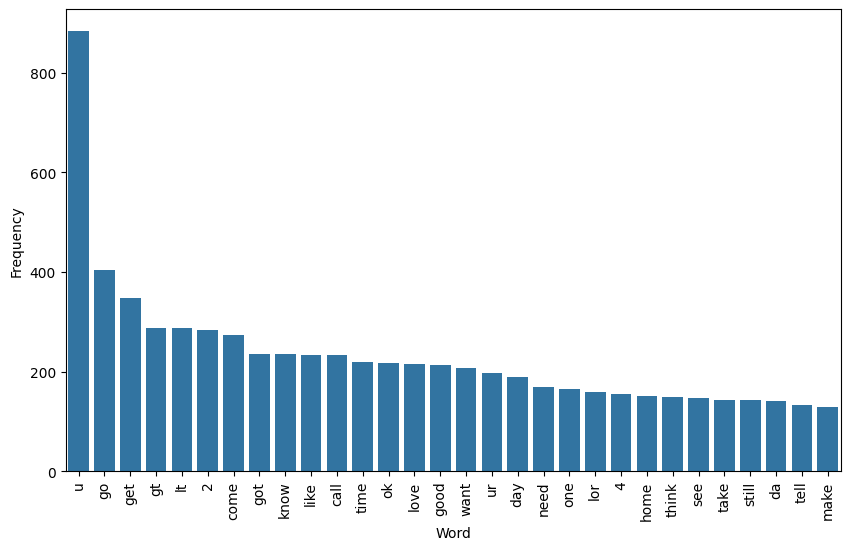

In [67]:
from collections import Counter
import pandas as pd

# Assuming ham_corpus is a list containing your data
counter_data = Counter(ham_corpus).most_common(30)
df_counter = pd.DataFrame(counter_data, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_counter)
plt.xticks(rotation='vertical')
plt.show()


In [68]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building - NAIVE BAYES

In [69]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [70]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [71]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
X.shape

(5167, 3000)

In [73]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [74]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [75]:
X.shape

(5167, 3000)

In [76]:
y = df['target'].values

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[806 104]
 [ 27  97]]
0.48258706467661694


In [82]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[910   0]
 [ 23 101]]
1.0


In [83]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[907   3]
 [ 21 103]]
0.9716981132075472


In [84]:
# tfidf --> MNB

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [86]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [87]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [88]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [89]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9803921568627451)

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9803921568627451
For  KN
Accuracy -  0.9129593810444874
Precision -  1.0
For  NB
Accuracy -  0.9777562862669246
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.7708333333333334
For  LR
Accuracy -  0.9497098646034816
Precision -  0.9285714285714286
For  RF
Accuracy -  0.9748549323017408
Precision -  0.99
For  AdaBoost
Accuracy -  0.9593810444874274
Precision -  0.9456521739130435
For  BgC
Accuracy -  0.9526112185686654
Precision -  0.831858407079646
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9523809523809523
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9058823529411765
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9690721649484536


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [92]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912959,1.000000
2,NB,0.977756,1.000000
5,RF,0.974855,0.990000
0,SVC,0.974855,0.980392
10,xgb,0.968085,0.969072
8,ETC,0.971954,0.952381
6,AdaBoost,0.959381,0.945652
4,LR,0.949710,0.928571
9,GBDT,0.946809,0.905882
7,BgC,0.952611,0.831858


In [93]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [94]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912959
1,NB,Accuracy,0.977756
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.974855
4,xgb,Accuracy,0.968085
5,ETC,Accuracy,0.971954
6,AdaBoost,Accuracy,0.959381
7,LR,Accuracy,0.949710
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.952611


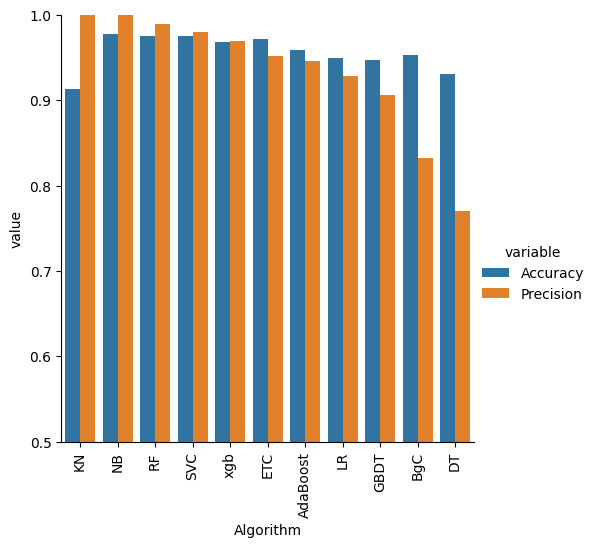

In [95]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [99]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [100]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [101]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [102]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912959,1.000000,0.912959,1.000000,0.912959,1.000000,0.912959,1.000000
1,NB,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000
2,RF,0.974855,0.990000,0.974855,0.990000,0.974855,0.990000,0.974855,0.990000
3,SVC,0.974855,0.980392,0.974855,0.980392,0.974855,0.980392,0.974855,0.980392
4,xgb,0.968085,0.969072,0.968085,0.969072,0.968085,0.969072,0.968085,0.969072
5,ETC,0.971954,0.952381,0.971954,0.952381,0.971954,0.952381,0.971954,0.952381
6,AdaBoost,0.959381,0.945652,0.959381,0.945652,0.959381,0.945652,0.959381,0.945652
7,LR,0.949710,0.928571,0.949710,0.928571,0.949710,0.928571,0.949710,0.928571
8,GBDT,0.946809,0.905882,0.946809,0.905882,0.946809,0.905882,0.946809,0.905882
9,BgC,0.952611,0.831858,0.952611,0.831858,0.952611,0.831858,0.952611,0.831858


In [103]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [104]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [105]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [106]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9905660377358491


In [107]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [108]:
from sklearn.ensemble import StackingClassifier

In [109]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [110]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9646017699115044


In [111]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [112]:
from joblib import dump

# Save the models
dump(tfidf,'vectorizer.joblib')
dump(mnb,'model.joblib')


['model.joblib']